In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv(r'C:\Users\lenovo\OneDrive\Desktop\TASK2\student-mat.csv')

In [17]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [18]:
print("\nChecking for missing values:")
print(df.isnull().sum())


Checking for missing values:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [19]:
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2, G3]
Index: []

[0 rows x 33 columns]


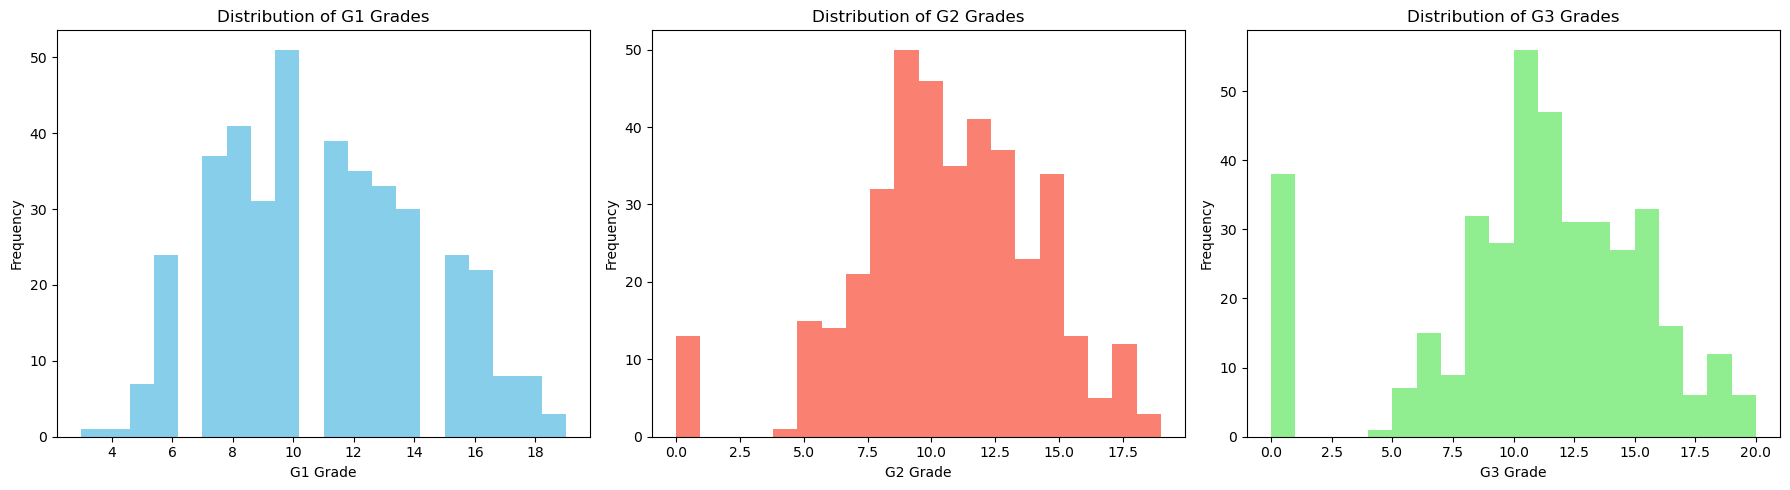

In [20]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.hist(df['G1'], bins=20, color='skyblue')
plt.title('Distribution of G1 Grades')
plt.xlabel('G1 Grade')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df['G2'], bins=20, color='salmon')
plt.title('Distribution of G2 Grades')
plt.xlabel('G2 Grade')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df['G3'], bins=20, color='lightgreen')
plt.title('Distribution of G3 Grades')
plt.xlabel('G3 Grade')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

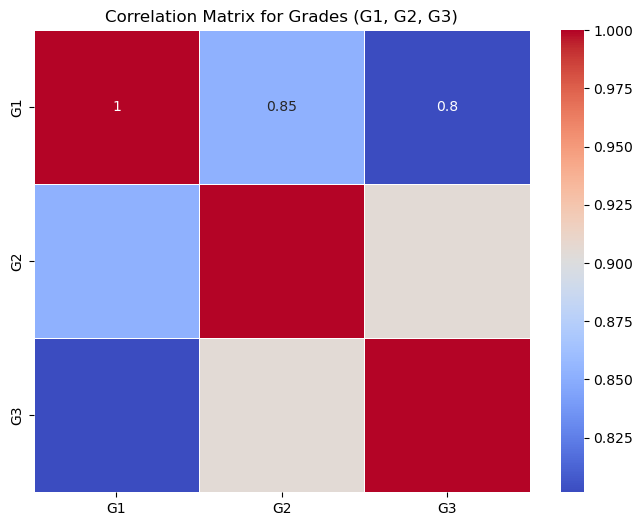

In [21]:
correlation_matrix = df[['G1', 'G2', 'G3']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix for Grades (G1, G2, G3)')
plt.show()

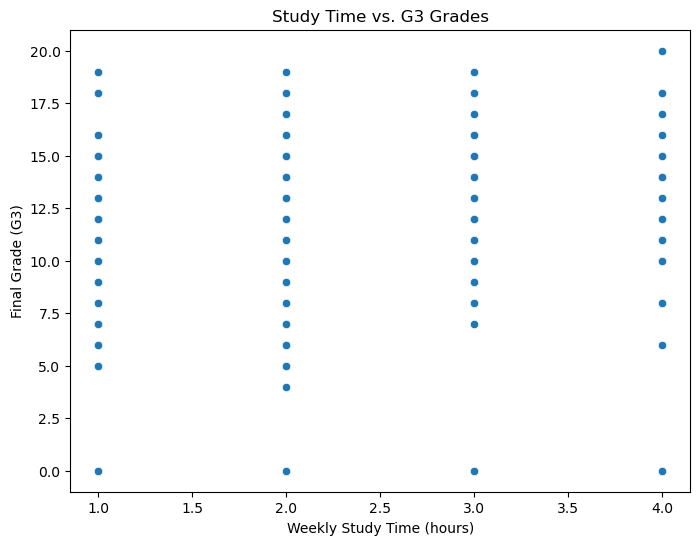

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='studytime', y='G3', data=df)
plt.title('Study Time vs. G3 Grades')
plt.xlabel('Weekly Study Time (hours)')
plt.ylabel('Final Grade (G3)')
plt.show()

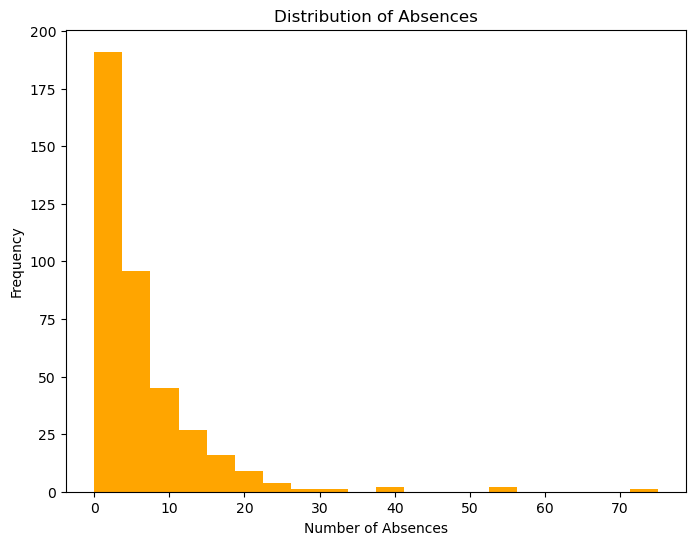

In [23]:
plt.figure(figsize=(8, 6))
plt.hist(df['absences'], bins=20, color='orange')
plt.title('Distribution of Absences')
plt.xlabel('Number of Absences')
plt.ylabel('Frequency')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df.drop(['G3'], axis=1)
y = df['G3']

X_encoded = pd.get_dummies(X)

X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train_encoded, y_train_encoded)

predictions_encoded = model.predict(X_test_encoded)

mse_encoded = mean_squared_error(y_test_encoded, predictions_encoded)
mae_encoded = mean_absolute_error(y_test_encoded, predictions_encoded)
r2_encoded = r2_score(y_test_encoded, predictions_encoded)

print("Model Evaluation with One-Hot Encoding:")
print(f"Mean Squared Error (MSE): {mse_encoded}")
print(f"Mean Absolute Error (MAE): {mae_encoded}")
print(f"R-squared Score (R2): {r2_encoded}")


Model Evaluation with One-Hot Encoding:
Mean Squared Error (MSE): 5.655773669858522
Mean Absolute Error (MAE): 1.6466018097310127
R-squared Score (R2): 0.7241765114744864


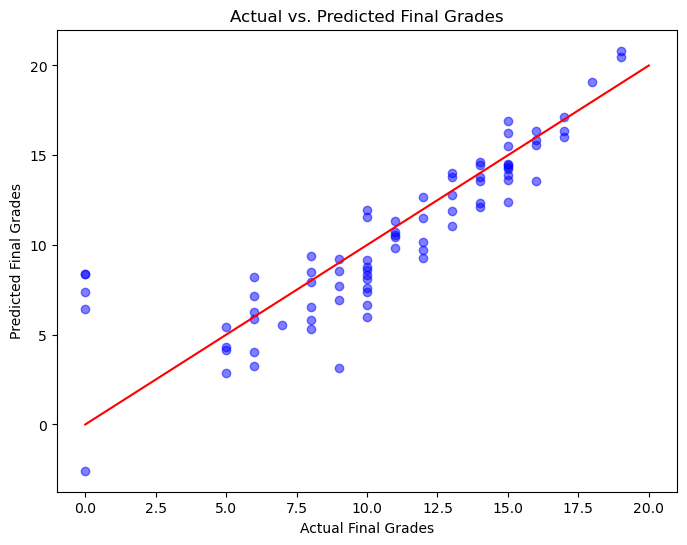

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_encoded, predictions_encoded, color='blue', alpha=0.5)
plt.plot([0, 20], [0, 20], color='red')
plt.title('Actual vs. Predicted Final Grades')
plt.xlabel('Actual Final Grades')
plt.ylabel('Predicted Final Grades')
plt.show()